# 🌦️ Predicción de Lluvia con Datos Meteorológicos
Este notebook forma parte del proyecto de storytelling de minería de datos. Analiza una base meteorológica australiana para predecir si lloverá mañana, aplicando modelos y visualizaciones.

In [4]:
# 📥 Carga de Datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Subir el archivo desde el equipo (solo en Colab)
from google.colab import files
uploaded = files.upload()

# Leer CSV directamente desde el nombre del archivo subido
filename = list(uploaded.keys())[0]
df = pd.read_csv('weatherAUS_clean.csv')
df.head()

Saving weatherAUS_clean.csv to weatherAUS_clean (1).csv


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DayOfYear
0,13.4,22.9,0.6,270.0,44.0,270.0,292.5,20.0,24.0,71.0,...,1007.7,1007.1,16.9,21.8,0,0,2008,12,1,336
1,7.4,25.1,0.0,292.5,44.0,337.5,247.5,4.0,22.0,44.0,...,1010.6,1007.8,17.2,24.3,0,0,2008,12,2,337
2,12.9,25.7,0.0,247.5,46.0,270.0,247.5,19.0,26.0,38.0,...,1007.6,1008.7,21.0,23.2,0,0,2008,12,3,338
3,9.2,28.0,0.0,45.0,24.0,135.0,90.0,11.0,9.0,45.0,...,1017.6,1012.8,18.1,26.5,0,0,2008,12,4,339
4,17.5,32.3,1.0,270.0,41.0,67.5,315.0,7.0,20.0,82.0,...,1010.8,1006.0,17.8,29.7,0,0,2008,12,5,340


## 📊 Análisis Exploratorio de Datos (EDA)

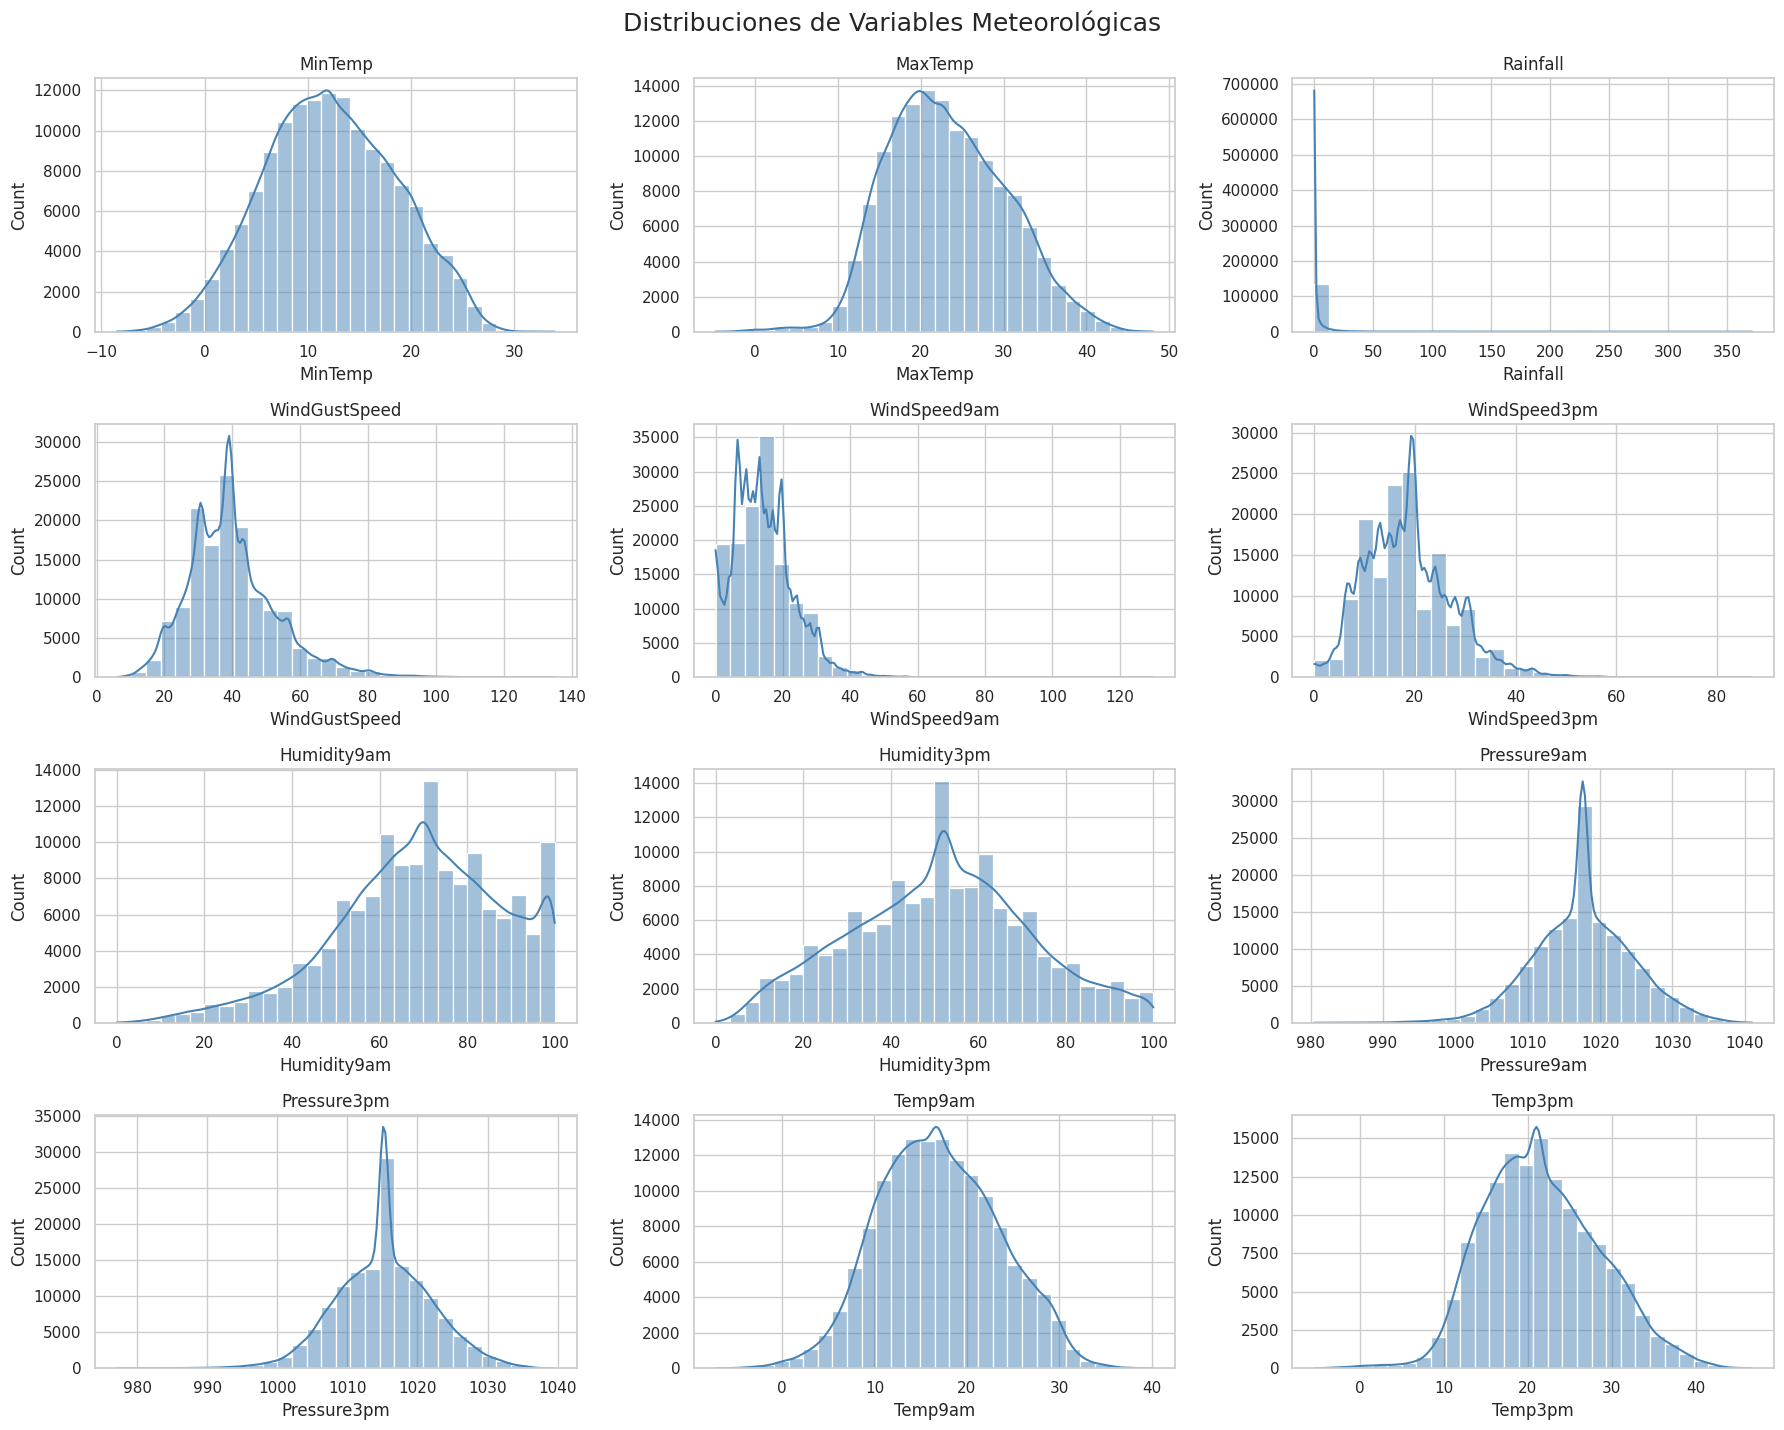

In [5]:
# Selección de columnas numéricas
numeric_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'
]

# Histograma de distribuciones
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.suptitle('Distribuciones de Variables Meteorológicas', fontsize=18, y=1.02)
plt.show()

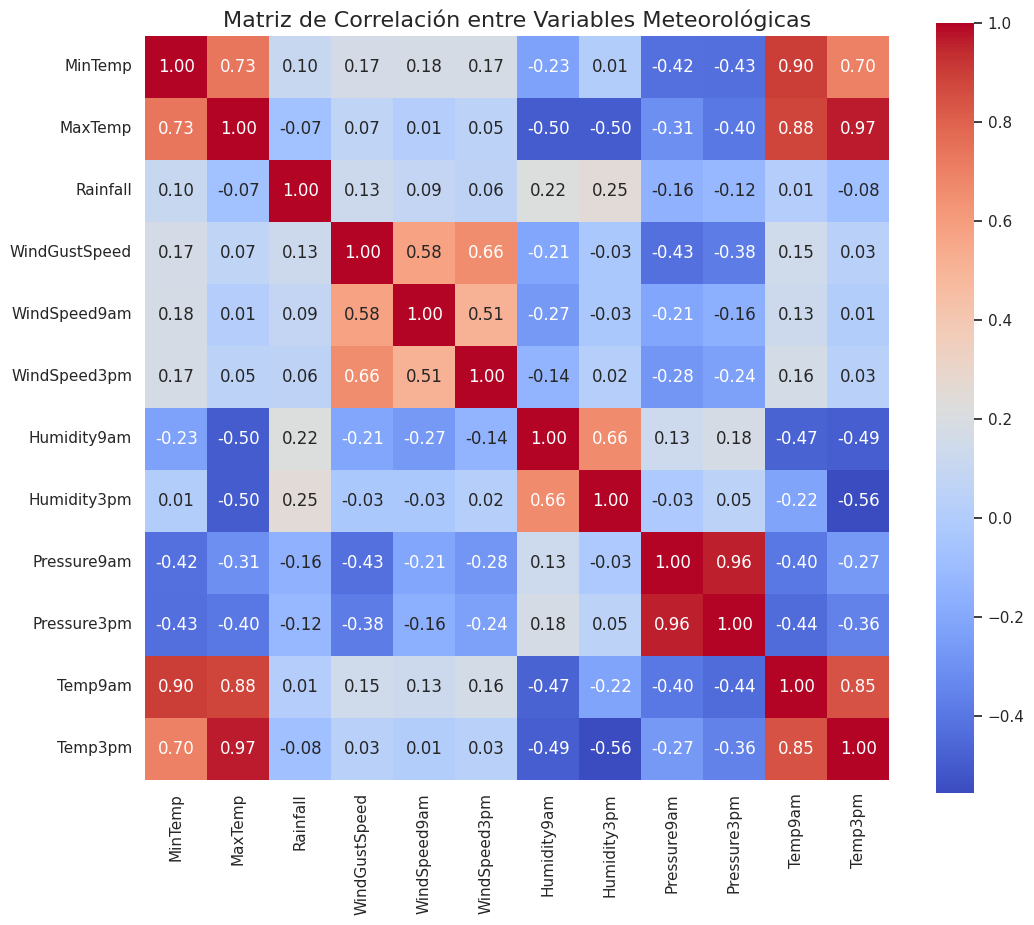

In [6]:
# Matriz de correlación
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación entre Variables Meteorológicas', fontsize=16)
plt.show()

## 🌳 Modelo de Clasificación - Árbol de Decisión

[[31608  1525]
 [ 5807  3718]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.90     33133
           1       0.71      0.39      0.50      9525

    accuracy                           0.83     42658
   macro avg       0.78      0.67      0.70     42658
weighted avg       0.81      0.83      0.81     42658



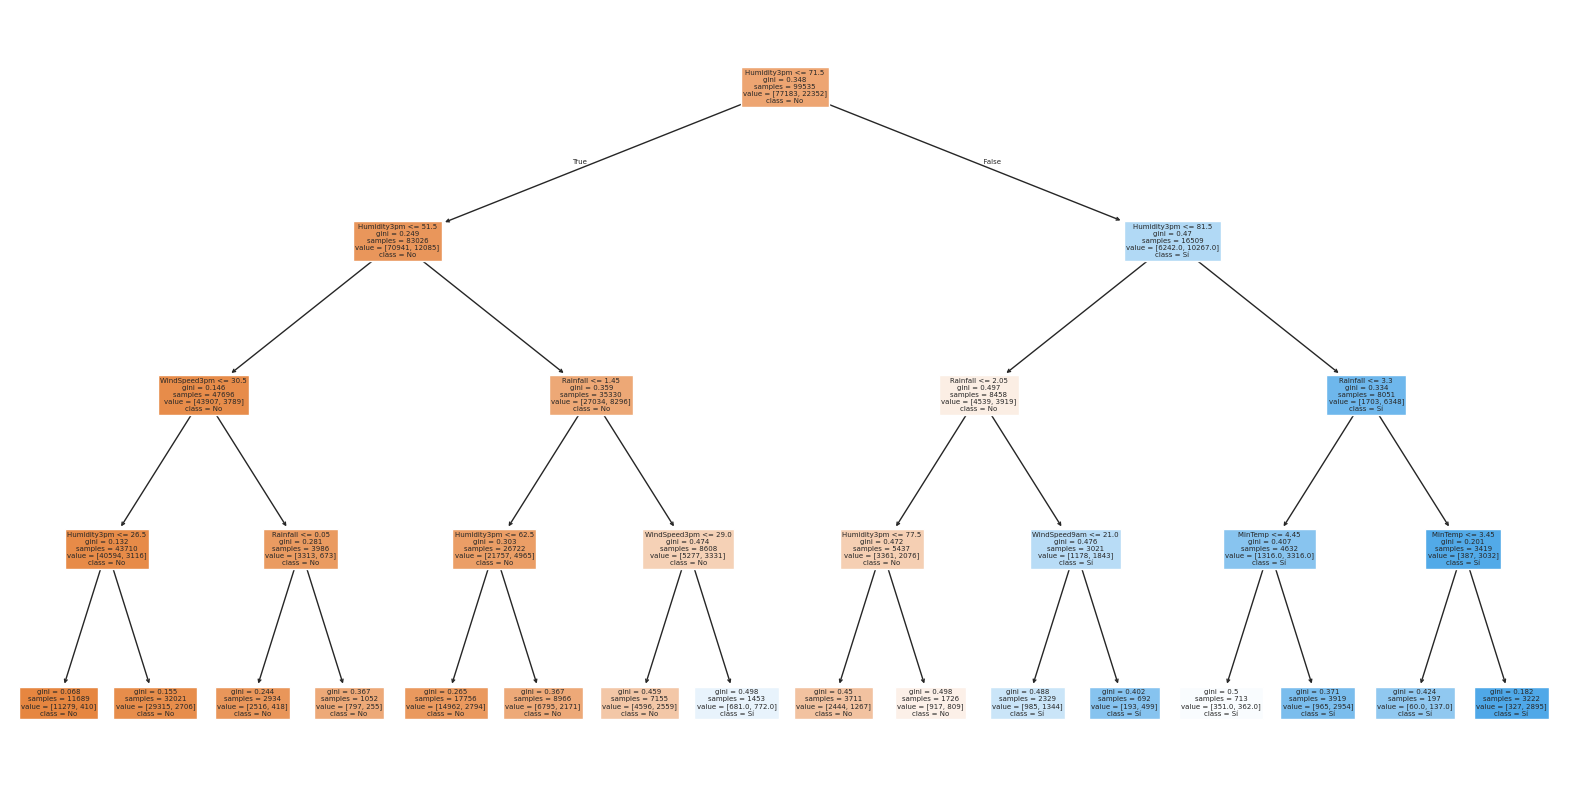

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']
X = df[features]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features, class_names=['No', 'Sí'], filled=True)
plt.show()

## 📌 Clustering - K-Means

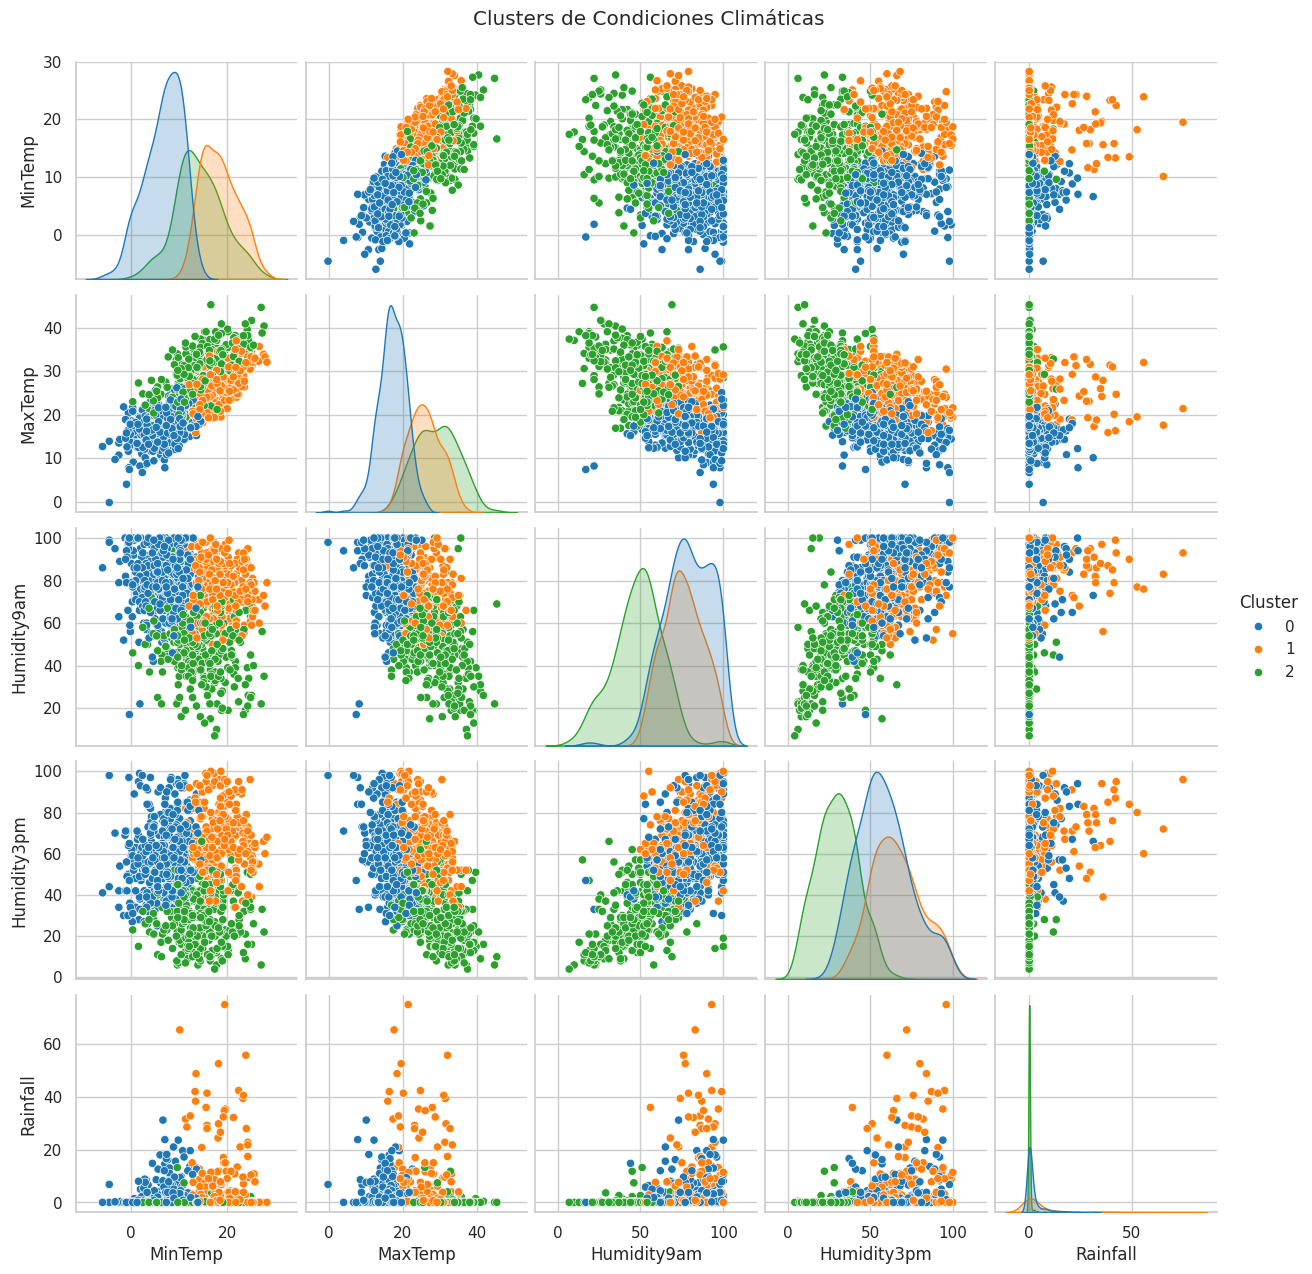

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Rainfall']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cluster_features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.pairplot(df.sample(1000), vars=cluster_features, hue='Cluster', palette='tab10')
plt.suptitle('Clusters de Condiciones Climáticas', y=1.02)
plt.show()